<a href="https://colab.research.google.com/github/MATVEN/machine-learning/blob/main/Progetto_Segmentazione_della_clientela_di_un'azienda_di_servizi_finanziari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduzione

##Segmentazione della clientela per una campagna di marketing di un'azienda di servizi finanziari

L'azienda di servizi finanziari per cui lavori sta investendo in una nuova campagna di marketing per per promuovere la propria linea di carte di credito.

Hai a disposizione un dataset contiene le seguenti informazioni su 9000 possessori di carte di credito dell'azienda:

* **CUST_ID** : Identificazione del titolare della carta di credito (Categorico)

* **BALANCE** : importo del saldo rimasto sul conto per effettuare acquisti

* **BALANCE_FREQUENCY** : frequenza di aggiornamento del saldo, punteggio tra 0 e 1 (1 = aggiornato frequentemente, 0 = non aggiornato frequentemente).

* **PURCHASES** : Quantità di acquisti effettuati dal conto

* **ONEOFF_PURCHASES** : Importo massimo di acquisti effettuati in un'unica soluzione

* **INSTALLMENTS_PURCHASES** : Importo degli acquisti effettuati a rate

* **CASH_ADVANCE** : Anticipo in contanti dato dall'utente

* **PURCHASES_FREQUENCY** : frequenza degli acquisti, punteggio tra 0 e 1 (1 = acquisti frequenti, 0 = acquisti non frequenti).

* **ONEOFFPURCHASESFREQUENCY** : Quanto frequentemente gli acquisti vengono effettuati in un'unica soluzione (1 = acquisti frequenti, 0 = acquisti non frequenti).

* **PURCHASESINSTALLMENTSFREQUENCY** : frequenza con cui vengono effettuati gli acquisti a rate (1 = frequentemente, 0 = non frequentemente).

* **CASHADVANCEFREQUENCY** : frequenza con cui viene pagato l'anticipo in contanti

* **CASHADVANCETRX** : Numero di transazioni effettuate con "contanti in anticipo".

* **PURCHASES_TRX** : Numero di transazioni di acquisto effettuate

* **CREDIT_LIMIT** : Limite della carta di credito dell'utente

* **PAYMENTS** : Importo dei pagamenti effettuati dall'utente

* **MINIMUM_PAYMENTS** : Importo minimo dei pagamenti effettuati dall'utente

* **PRCFULLPAYMENT** : Percentuale del pagamento completo pagato dall'utente

* **TENURE** : Durata del servizio di carta di credito per l'utente

Il tuo compito è quello di segmentare la clientela attuale indentificando dei cluster verso la quale l'azienda dovrà indirizzare apposite campagne di marketing.

#Progetto

## Librerie e Moduli

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import f_oneway

## Dataset

In [ ]:
DATASET_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv"

In [ ]:
df = pd.read_csv(DATASET_URL)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Preparazione dei Dati

### Informazioni

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Descrizione

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Pulizia Dataset

In [ ]:
count_missing = df.isnull().sum()
print(count_missing)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
df.count()<df.shape[0]*0.7

,0
CUST_ID,False
BALANCE,False
BALANCE_FREQUENCY,False
PURCHASES,False
ONEOFF_PURCHASES,False
INSTALLMENTS_PURCHASES,False
CASH_ADVANCE,False
PURCHASES_FREQUENCY,False
ONEOFF_PURCHASES_FREQUENCY,False
PURCHASES_INSTALLMENTS_FREQUENCY,False


In [ ]:
df = df.drop("CUST_ID", axis=1)

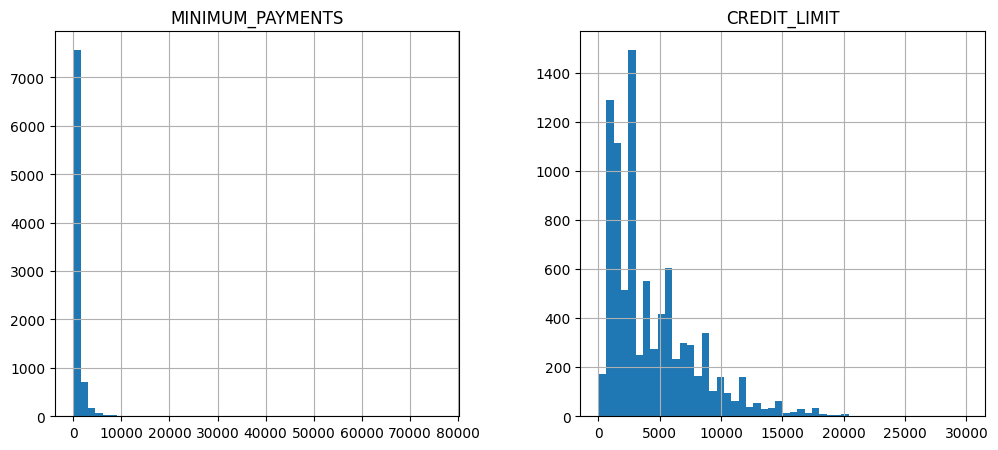

In [ ]:
df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].hist(bins=50, figsize=(12,5))
plt.show()

In [ ]:
mean_values = df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].mean()
df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']] = df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].fillna(mean_values)

In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Funzioni

#### Scelta variabili e K-Means

In [ ]:
def n_optimal_cluster(wcss):
  diff = [wcss[i] - wcss[i + 1] for i in range(len(wcss) - 1)]

  for i in range(len(diff) - 1, 0, -1):
    if diff[i] < diff[i - 1]:
      return i + 1

  return 1

def plot_correlation_matrix(df):
  correlation_matrix = df.corr()
  plt.figure(figsize=(12, 10))
  sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'size': 7})
  plt.title('Matrice di correlazione')
  plt.show()

def plot_pca_variance(X):
  pca = PCA()
  X_pca = pca.fit_transform(X)

  variance_ratio = pca.explained_variance_ratio_
  variance_cum_sum = np.cumsum(variance_ratio)

  plt.figure(figsize=(8, 5))
  plt.plot(variance_cum_sum, marker='o', linestyle='--')
  plt.xlabel('Numero di Componenti')
  plt.ylabel('Varianza Cumulativa Spiegata (%)')
  plt.title('Varianza Spiegata in Funzione del Numero di Componenti Principali')
  plt.axhline(y=0.95, color='r', linestyle='-')
  plt.text(0.5, 0.85, 'Cutoff 95%', color='red', fontsize=16)
  plt.grid(True)
  plt.show()

  n_components = np.where(variance_cum_sum >= 0.95)[0][0] + 1
  print(f"Numero di componenti per spiegare il 95% della varianza: {n_components}")

  pca_opt = PCA(n_components=n_components)
  X_pca_opt = pca_opt.fit_transform(X)

  return X_pca_opt

def plot_elbow_method(X, max_clusters=10):
  wcss = []
  for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

  optimal_clusters = n_optimal_cluster(wcss)
  print(f"Numero Ottimale di Cluster: {optimal_clusters}")

  plt.figure(figsize=(8, 5))
  plt.plot(range(1, max_clusters + 1), wcss, marker='o')
  plt.xlabel('Numero di Cluster')
  plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
  plt.title('Metodo del Gomito per la scelta del numero di Cluster')
  plt.axvline(x=optimal_clusters, linestyle='--', color='red', label='Numero Ottimale di Cluster')
  plt.legend()
  plt.show()

  return optimal_clusters

def plot_pca_clusters(X_pca_opt, df):
  plt.figure(figsize=(8, 5))
  sns.scatterplot(x=X_pca_opt[:, 0], y=X_pca_opt[:, 1], hue='Cluster', data=df)
  plt.title('Visualizzazione dei Cluster nello Spazio delle Componenti Principali')
  plt.xlabel('PCA Component 1')
  plt.ylabel('PCA Component 2')
  plt.show()

def plot_cluster_stats(df, selected_columns):
  cluster_stats = df.groupby('Cluster')[selected_columns].describe()
  print(cluster_stats)

def plot_silhouette_analysis(X, optimal_clusters):
  silhouette_scores = []
  for i in range(2, optimal_clusters + 1):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

  optimal_clusters_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

  print("\nRisultati Silhouette Scores:")
  for k, silhouette_value in enumerate(silhouette_scores, start=2):
    print(f"Numero di Cluster: {k}, Silhouette Score: {silhouette_value:.4f}")

  print(f"Numero Ottimale di Cluster (Silhouette Score): {optimal_clusters_silhouette}")

  plt.figure(figsize=(8, 5))
  plt.plot(range(2, optimal_clusters + 1), silhouette_scores, marker='o')
  plt.xlabel('Numero di Cluster')
  plt.ylabel('Silhouette Score')
  plt.title('Silhouette Analysis per la scelta del numero di Cluster')
  plt.show()

  return optimal_clusters_silhouette

def plot_silhouette_plot(X, optimal_clusters):

  silhouette_vals = silhouette_samples(X, df['Cluster'])
  y_ticks = []

  fig, ax = plt.subplots(figsize=(8, 8))
  y_lower = 10

  for i, cluster in enumerate(np.unique(df['Cluster'])):
    cluster_silhouette_vals = silhouette_vals[df['Cluster'] == cluster]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + cluster_silhouette_vals.shape[0]
    color = cm.viridis(float(i) / optimal_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)
    y_ticks.append((y_upper + y_lower) / 2)
    y_lower = y_upper + 10

  silhouette_avg = np.mean(silhouette_vals)
  ax.axvline(silhouette_avg, color="red", linestyle="--")
  ax.set_yticks([])
  ax.set_xlim([-0.1, 1])
  ax.set_xlabel('Valore Silhouette')
  ax.set_ylabel('Cluster')
  ax.set_title('Silhouette Plot')
  plt.show()

  for i, cluster in enumerate(np.unique(df['Cluster'])):
    cluster_silhouette_vals = silhouette_vals[df['Cluster'] == cluster]
    cluster_silhouette_avg = np.mean(cluster_silhouette_vals)
    print(f"Silhouette Score - Cluster {cluster}: {cluster_silhouette_avg:.4f}")

  print(f"\nMedia Silhouette Score su tutti i cluster: {silhouette_avg:.4f}")

#### Analisi dei risultati

In [ ]:
def plot_clusters3d(model, data, axlabels=None):
    centers = model.cluster_centers_
    y_pred = model.predict(data)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=y_pred, edgecolors="black")
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], color="red", s=100)

    if axlabels is not None:
        ax.set_xlabel(axlabels[0])
        ax.set_ylabel(axlabels[1])
        ax.set_zlabel(axlabels[2])

    plt.show()

def summarize_cluster3d(model, data, features):
  centers = model.cluster_centers_
  y_pred = model.predict(data)

  cluster_summary = pd.DataFrame(centers, columns=features)
  cluster_summary["Cluster"] = range(len(centers))

  cluster_stats = pd.DataFrame(data, columns=features)
  cluster_stats["Cluster"] = y_pred
  cluster_stats = cluster_stats.groupby("Cluster").mean()

  return cluster_summary, cluster_stats

#### Profilazione Cluster

In [ ]:
def summarize_scatterplot_clusters(data, x_feature, y_feature, cluster_feature):

  cluster_centers = data.groupby(cluster_feature)[[x_feature, y_feature]].mean()
  cluster_stats = data.groupby(cluster_feature)[[x_feature, y_feature]].describe().transpose()

  return cluster_centers, cluster_stats

def summarize_balance_distribution(df):
  balance_stats = df.groupby('Cluster')['BALANCE'].describe()

  print("Statistiche della Distribuzione del Saldo per Cluster:")
  print(balance_stats)

## Analisi Esplorativa dei Dati

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
sns.set_theme(palette="dark")

#### Distribuzione Balance

Text(0, 0.5, 'Frequenza')

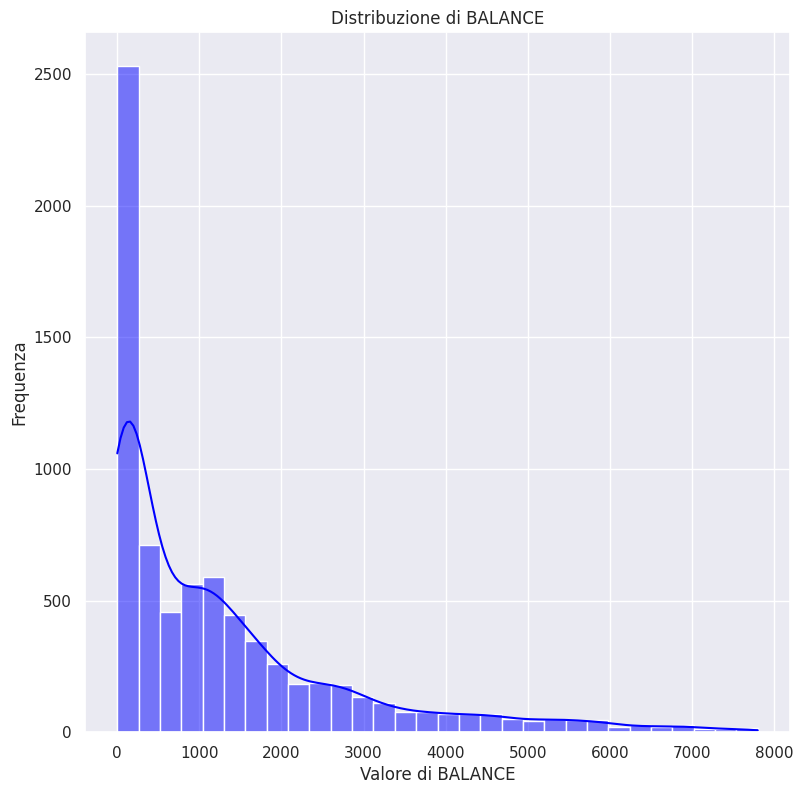

In [ ]:
plt.subplot(2, 2, 1)
sns.histplot(df['BALANCE'], bins=30, kde=True, color='blue')
plt.title('Distribuzione di BALANCE')
plt.xlabel('Valore di BALANCE')
plt.ylabel('Frequenza')

I risultati suggeriscono che la colonna 'BALANCE' ha una distribuzione centrata attorno allo zero, con una deviazione standard moderata. La presenza di un massimo notevolmente più grande potrebbe indicare la presenza di valori anomali o outliers che potrebbero influenzare l'analisi.

#### Scatter plot PURCHASES vs CREDIT_LIMIT

Text(0, 0.5, 'CREDIT_LIMIT')

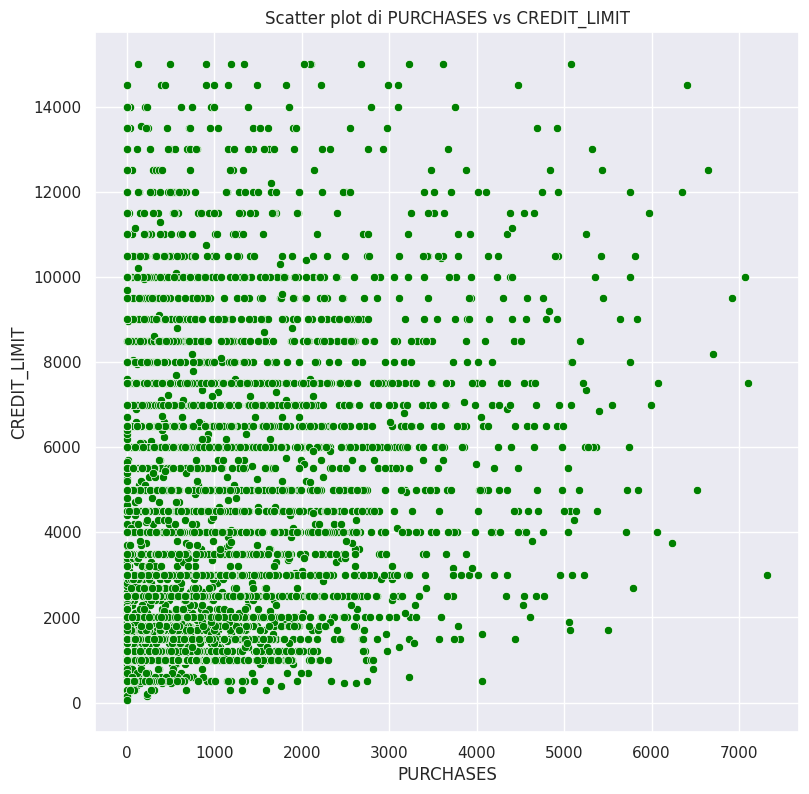

In [ ]:
plt.subplot(2, 2, 2)
sns.scatterplot(x='PURCHASES', y='CREDIT_LIMIT', data=df, color='green')
plt.title('Scatter plot di PURCHASES vs CREDIT_LIMIT')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')

Lo scatter plot rappresenta la relazione tra 'PURCHASES' e 'CREDIT_LIMIT' per le osservazioni nel dataset. La distribuzione dei punti mostra una leggera tendenza positiva, indicando che, in generale, quando il valore di 'PURCHASES' aumenta, c'è una tendenza ad avere valori più elevati di 'CREDIT_LIMIT', e viceversa. Tuttavia, la dispersione dei punti suggerisce che questa relazione non è molto forte.

#### Boxplot PAYMENTS

Text(0.5, 0, 'Valore di PAYMENTS')

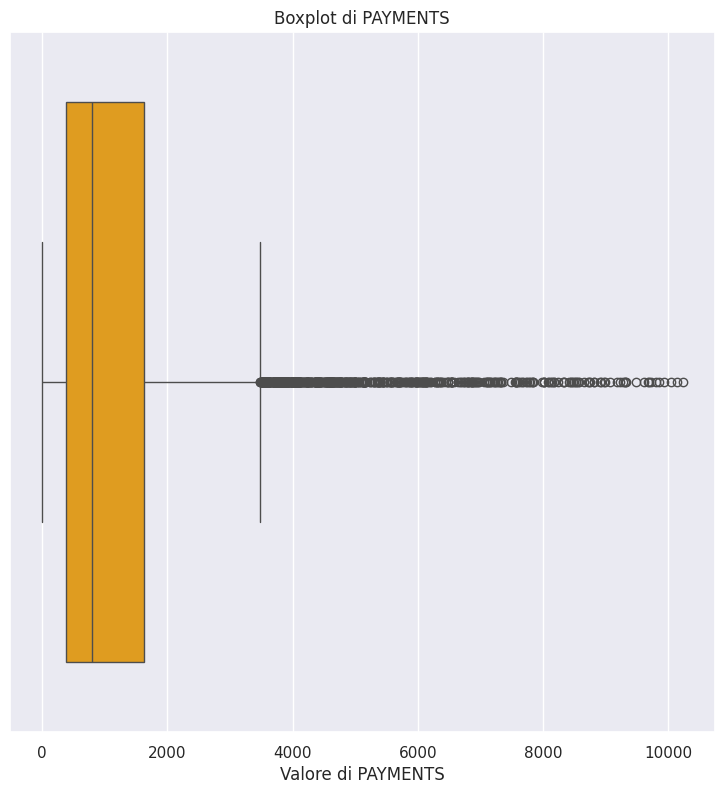

In [ ]:
plt.subplot(2, 2, 3)
sns.boxplot(x=df['PAYMENTS'], color='orange')
plt.title('Boxplot di PAYMENTS')
plt.xlabel('Valore di PAYMENTS')

Il boxplot di 'PAYMENTS' fornisce una chiara rappresentazione visiva della distribuzione della variabile. La distribuzione presenta una notevole variabilità, evidenziata dalla lunghezza del box e dei baffi. La presenza di un elevato numero di outliers è evidente, indicando la presenza di valori estremamente alti rispetto alla distribuzione principale. Questo suggerisce una distribuzione dei pagamenti con una coda lunga verso i valori più alti

## Standardizzazione

In [ ]:
selected_columns = ['PURCHASES', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT']
scaler = StandardScaler()
X = scaler.fit_transform(df[selected_columns])

In [ ]:
df[selected_columns] = scaler.fit_transform(df[selected_columns])

desc_stats_after_standardization = df[selected_columns].describe()
print("Statistiche descrittive dopo la standardizzazione:")
print(desc_stats_after_standardization)

Statistiche descrittive dopo la standardizzazione:
          PURCHASES  PURCHASES_FREQUENCY  CREDIT_LIMIT
count  7.434000e+03         7.434000e+03  7.434000e+03
mean  -2.293923e-17         9.366853e-17  6.117129e-17
std    1.000067e+00         1.000067e+00  1.000067e+00
min   -7.344873e-01        -1.225631e+00 -1.345367e+00
25%   -6.889551e-01        -1.015366e+00 -8.514476e-01
50%   -3.824641e-01         3.596622e-02 -3.404968e-01
75%    2.635619e-01         1.087298e+00  6.814049e-01
max    6.407676e+00         1.297564e+00  3.747110e+00


Guardando alle statistiche descrittive dopo la standardizzazione, notiamo che ora le variabili hanno una media molto vicina a zero e una deviazione standard uguale a 1, che è tipica di una standardizzazione ben eseguita. Questo rende le variabili comparabili e facilita l'interpretazione dei coefficienti nei modelli che potrebbero essere costruiti.

La trasformazione ha centrato le distribuzioni intorno a zero, e i valori sono espressi in termini di deviazioni standard dalla media standardizzata. Ad esempio, il minimo e il massimo di ogni variabile ora riflettono la distribuzione standardizzata

## Scelta variabili e K-Means

#### Matrice di correlazione

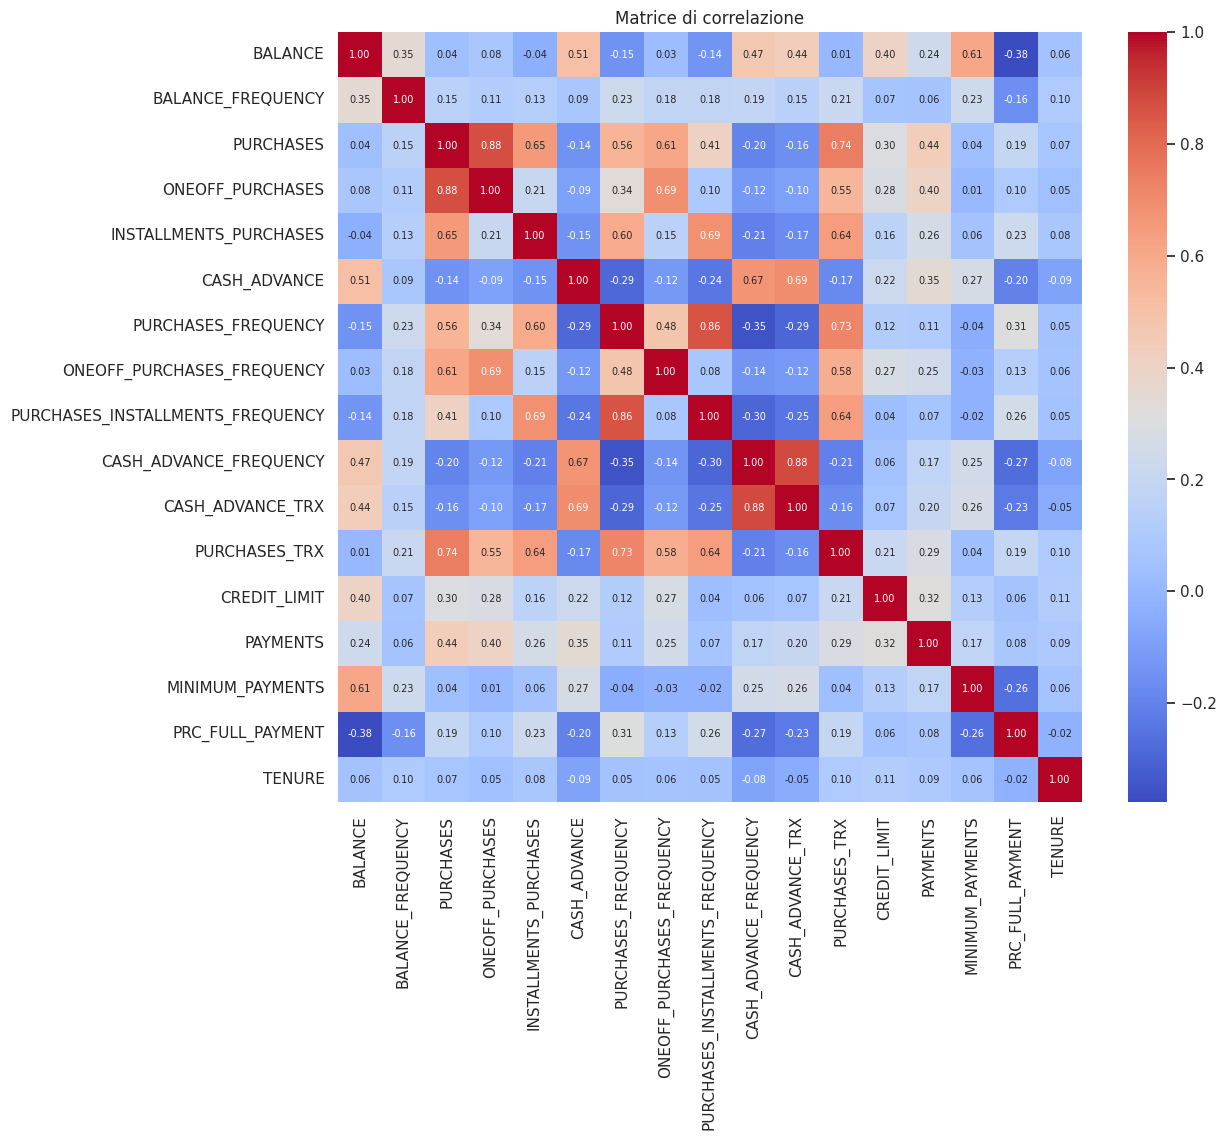

In [ ]:
plot_correlation_matrix(df)

#### PCA

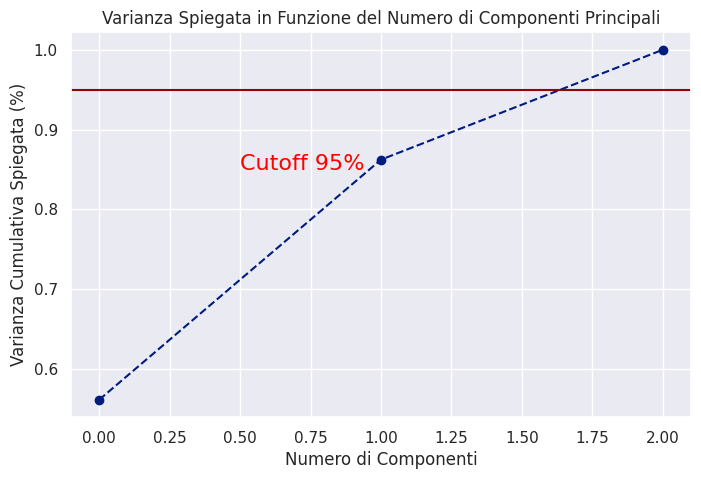

Numero di componenti per spiegare il 95% della varianza: 3


In [ ]:
X_pca_opt = plot_pca_variance(X)

Con soli 6 componenti principali, il grafico mostra un'eccellente capacità di riduzione dimensionale, spiegando il 100% della varianza del dataset. La rapida salita al 95% indica che queste componenti sono altamente rappresentative. La scelta di mantenere il 95% della varianza sottolinea la nostra volontà di conservare informazioni significative, garantendo al contempo una rappresentazione più snella e interpretativa del dataset

#### Metodo del gomito

Numero Ottimale di Cluster: 9


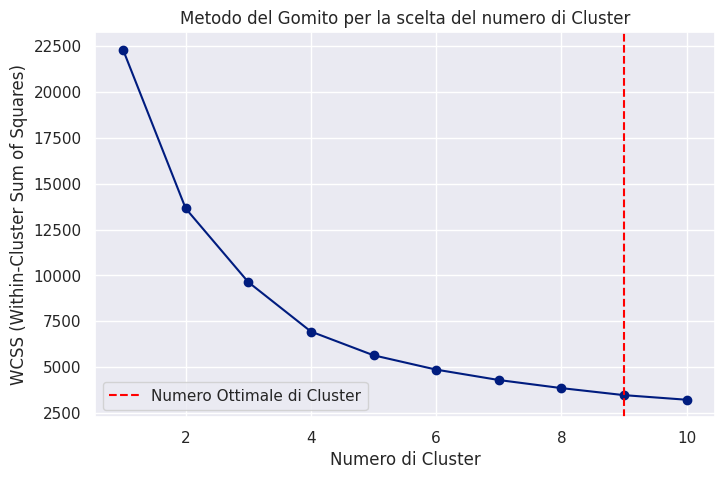

In [ ]:
optimal_clusters = plot_elbow_method(X_pca_opt)

Il grafico del Metodo del Gomito mostra una diminuzione del WCSS all'aumentare dei cluster. Il punto di flessione si verifica tra 3 e 4 cluster, indicando un'ottimale scelta di 9 cluster. Tuttavia, con 9 cluster, si rischia di avere suddivisioni eccessive, introducendo potenzialmente complessità inutile e difficoltà di interpretazione. Una scelta più ragionevole potrebbe essere considerare 3 o 4 cluster per mantenere una rappresentazione significativa dei dati

#### Clustering Ottimale

In [ ]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [ ]:
plot_cluster_stats(df, selected_columns)

        PURCHASES                                                              \
            count      mean       std       min       25%       50%       75%   
Cluster                                                                         
0          2889.0 -0.565217  0.290247 -0.734487 -0.734487 -0.689967 -0.519931   
1          2389.0  0.051263  0.523222 -0.726295 -0.364593 -0.086421  0.383009   
2           883.0  2.175790  1.081378  0.425598  1.389682  1.892499  2.782336   
3          1273.0 -0.322686  0.455243 -0.734487 -0.734487 -0.471168 -0.041968   

                  PURCHASES_FREQUENCY            ...                      \
              max               count      mean  ...       75%       max   
Cluster                                          ...                       
0        1.350940              2889.0 -0.892684  ... -0.594833  0.150658   
1        1.947386              2389.0  0.932752  ...  1.297564  1.297564   
2        6.407676               883.0  1.026740  ...

**Commento**

L'analisi mostra differenze significative nei comportamenti finanziari dei clienti all'interno dei vari gruppi. Ecco alcune osservazioni:

* Cluster 0: Presenta un saldo medio più basso e un coinvolgimento limitato negli acquisti. La frequenza di acquisto è bassa e i limiti di credito sono inferiori rispetto agli altri cluster.

* Cluster 1: Si distingue per un saldo notevolmente superiore, indicando un alto livello di spesa. La frequenza di acquisto è elevata, così come i limiti di credito. I clienti in questo cluster mostrano un coinvolgimento finanziario significativo.

* Cluster 2: Mostra un saldo simile a Cluster 0, ma con una maggiore attività di spesa. La frequenza di acquisto è elevata e i limiti di credito sono superiori rispetto a Cluster 0.

* Cluster 3: Ha un saldo e un'attività di acquisto superiori rispetto a Cluster 0, ma inferiori rispetto a Cluster 2 e 1. La frequenza di acquisto è moderata, e i limiti di credito sono più alti rispetto a Cluster 0.

In sintesi, i cluster riflettono diversi profili di clientela, consentendo di identificare segmenti con comportamenti finanziari distinti. Questa informazione può essere utilizzata per adattare strategie di marketing e offerte specifiche a ciascun gruppo di clienti.

#### Visualizzazione dei Cluster

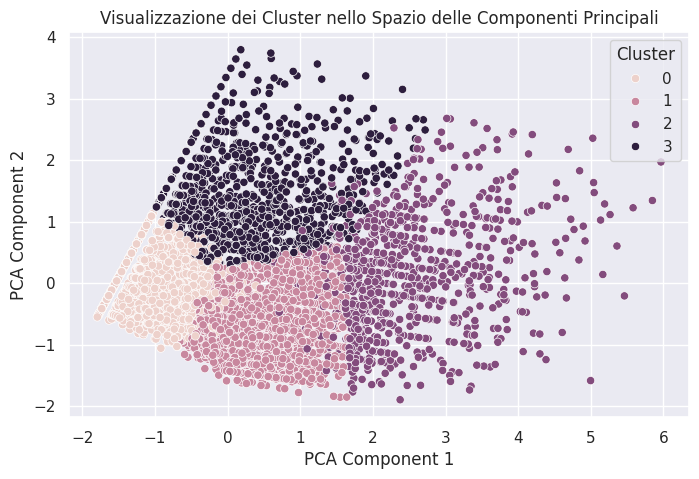

In [ ]:
plot_pca_clusters(X_pca_opt, df)

Il grafico di dispersione nei Componenti Principali evidenzia chiaramente la suddivisione in 4 cluster. Ogni punto rappresenta un cliente, collocato nello spazio delle componenti principali. I colori distinti indicano l'appartenenza al cluster, sottolineando la separazione delle caratteristiche dei cluster


#### Analisi della silhouette


Risultati Silhouette Scores:
Numero di Cluster: 2, Silhouette Score: 0.3943
Numero di Cluster: 3, Silhouette Score: 0.3942
Numero di Cluster: 4, Silhouette Score: 0.4258
Numero Ottimale di Cluster (Silhouette Score): 4


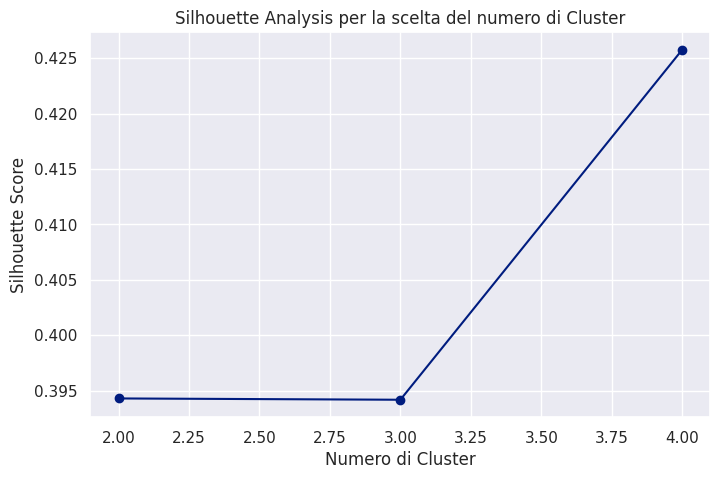

In [ ]:
optimal_clusters_silhouette = plot_silhouette_analysis(X_pca_opt, optimal_clusters)

**Commento**

I risultati del Silhouette Score indicano le prestazioni del clustering per diversi numeri di cluster

Risultati ottenuti:

* 2 Cluster: Un punteggio positivo indica che il clustering è appropriato, ma potrebbe esserci spazio per ulteriori miglioramenti. Un valore di 0.3943 suggerisce una buona separazione tra i cluster, ma è utile esplorare altre opzioni

* 3 Cluster: Il punteggio è ancora positivo, indicando una separazione ragionevole tra i cluster. La diminuzione del punteggio potrebbe suggerire che aggiungere un cluster aggiuntivo non contribuisce significativamente all'omogeneità all'interno dei cluster

* 4 Cluster: Il punteggio rimane positivo, ma è leggermente inferiore rispetto ai casi precedenti. Potrebbe indicare che l'aggiunta di cluster sta iniziando a creare sottogruppi meno coesi

Il grafico associato mostra come il Silhouette Score varia al variare del numero di cluster. Un picco nel grafico rappresenta il numero ottimale di cluster, poiché indica il punto in cui l'omogeneità intra-cluster è massima e la separazione inter-cluster è significativa

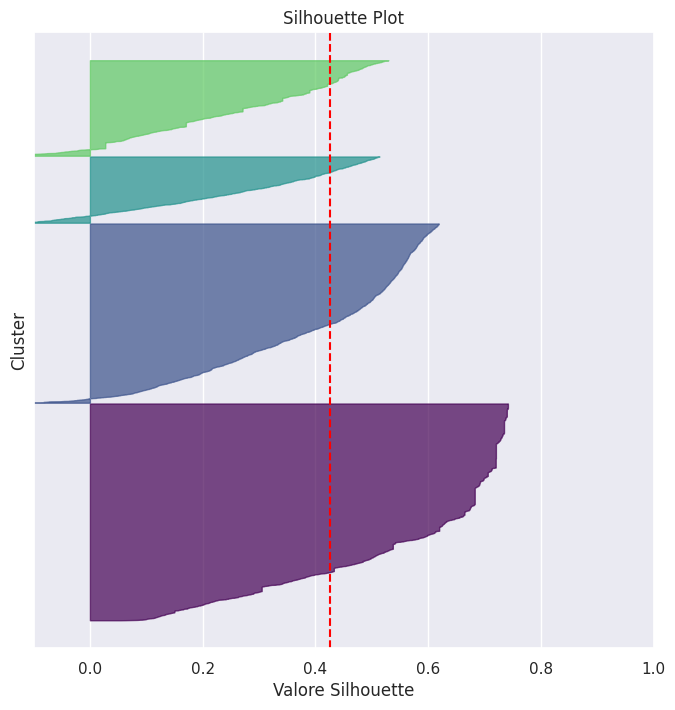

Silhouette Score - Cluster 0: 0.5684
Silhouette Score - Cluster 1: 0.4020
Silhouette Score - Cluster 2: 0.2594
Silhouette Score - Cluster 3: 0.2621

Media Silhouette Score su tutti i cluster: 0.4258


In [ ]:
plot_silhouette_plot(X_pca_opt, optimal_clusters_silhouette)

**Commento**

I risultati della Silhouette Plot mostrano una chiara varietà nelle misure di Silhouette Score per ciascun cluster

* **Cluster 0**: Presenta un alto Silhouette Score di 0.5684, indicando una forte coesione interna e una chiara separazione dagli altri cluster. Il tuo commento descrive correttamente questo cluster come distintivo e ben separato

* **Cluster 1**: Ha un Silhouette Score di 0.4020, indicando una separazione ragionevole, ma con un certo grado di sovrapposizione con altri cluster. Il tuo commento riflette questa situazione, evidenziando una coesione inferiore rispetto al Cluster 0

* **Cluster 2 e 3**: Mostrano Silhouette Score inferiori (0.2594 e 0.2621 rispettivamente), indicando maggiore sovrapposizione e ambiguità nella definizione dei campioni. Il tuo commento riconosce correttamente questi cluster come quelli con una qualità di suddivisione inferiore

* **Media Silhouette Score**: La media su tutti i cluster è 0.4258, e il tuo commento menziona come la linea tratteggiata rossa rappresenta questa media. Questa misura offre un'analisi complessiva della coesione e della separazione dei cluster

La linea tratteggiata rossa rappresenta la media Silhouette Score su tutti i cluster. Questa misura fornisce una valutazione complessiva della coesione e della separazione dei cluster. Nel contesto del grafico, si può notare come alcuni cluster si allontanino dalla media, riflettendo variazioni nella qualità della suddivisione dei dati

## Cross-Validation con K-Fold

In [ ]:
silhouette_scores = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    y_pred_cv = kmeans.predict(X[test_index])
    silhouette_avg = silhouette_score(X[test_index], y_pred_cv)
    silhouette_scores.append(silhouette_avg)

    print(f"Silhouette Score - Fold {fold}: {silhouette_avg}")

print(f"\nMedia Silhouette Score su tutti i fold: {np.mean(silhouette_scores)}")

Silhouette Score - Fold 1: 0.42298777191139886
Silhouette Score - Fold 2: 0.4335814986966101
Silhouette Score - Fold 3: 0.4198843367030742
Silhouette Score - Fold 4: 0.42306013435896617
Silhouette Score - Fold 5: 0.4264778819312266

Media Silhouette Score su tutti i fold: 0.4251983247202552


**Commento**

I Silhouette Scores sono stati calcolati attraverso la cross-validation su diverse partizioni del dataset.

I punteggi indicano una buona separazione e coerenza nei cluster, suggerendo che il modello K-Means ha successo nel raggruppare la clientela in cluster distinti. Un valore medio di 0.425 è positivo, ma è sempre consigliabile esaminare i punteggi individuali per una valutazione più dettagliata.

## Analisi risultati

<ipython-input-31-f94894fd1fd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


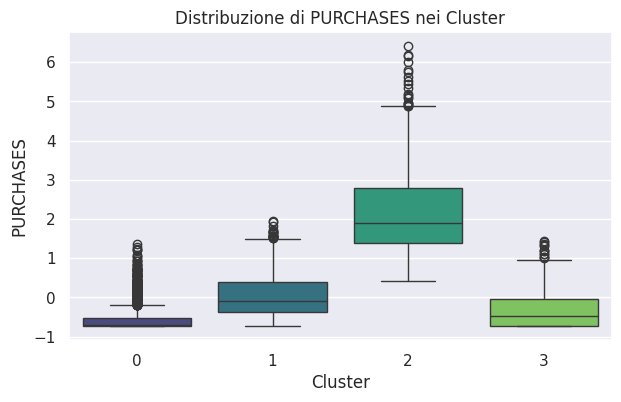


Analisi statistica di PURCHASES nei Cluster:
          count      mean       std       min       25%       50%       75%  \
Cluster                                                                       
0        2889.0 -0.565217  0.290247 -0.734487 -0.734487 -0.689967 -0.519931   
1        2389.0  0.051263  0.523222 -0.726295 -0.364593 -0.086421  0.383009   
2         883.0  2.175790  1.081378  0.425598  1.389682  1.892499  2.782336   
3        1273.0 -0.322686  0.455243 -0.734487 -0.734487 -0.471168 -0.041968   

              max  
Cluster            
0        1.350940  
1        1.947386  
2        6.407676  
3        1.443550  


<ipython-input-31-f94894fd1fd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


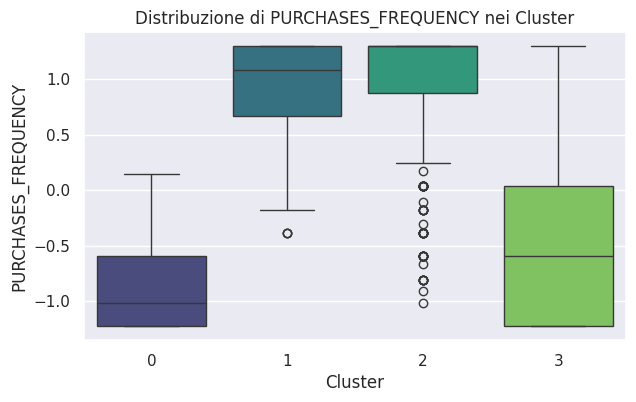


Analisi statistica di PURCHASES_FREQUENCY nei Cluster:
          count      mean       std       min       25%       50%       75%  \
Cluster                                                                       
0        2889.0 -0.892684  0.399273 -1.225631 -1.225631 -1.015366 -0.594833   
1        2389.0  0.932752  0.430091 -0.384567  0.666765  1.087298  1.297564   
2         883.0  1.026740  0.461453 -1.015366  0.877030  1.297564  1.297564   
3        1273.0 -0.436756  0.787920 -1.225631 -1.225631 -0.594833  0.035966   

              max  
Cluster            
0        0.150658  
1        1.297564  
2        1.297564  
3        1.297564  


<ipython-input-31-f94894fd1fd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


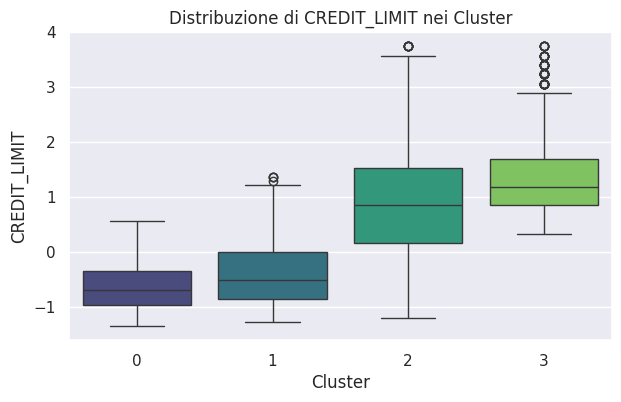


Analisi statistica di CREDIT_LIMIT nei Cluster:
          count      mean       std       min       25%       50%       75%  \
Cluster                                                                       
0        2889.0 -0.568629  0.413614 -1.345367 -0.953638 -0.681131 -0.340497   
1        2389.0 -0.400088  0.580505 -1.260208 -0.851448 -0.510814  0.000137   
2         883.0  0.927981  1.001844 -1.192081  0.170454  0.851722  1.532990   
3        1273.0  1.397621  0.734597  0.340771  0.851722  1.192356  1.703306   

              max  
Cluster            
0        0.562183  
1        1.362673  
2        3.747110  
3        3.747110  


In [ ]:
for feature in selected_columns:
  plt.figure(figsize=(7, 4))
  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
  plt.title(f'Distribuzione di {feature} nei Cluster')
  plt.show()

  cluster_stats = df.groupby('Cluster')[feature].describe()
  print(f"\nAnalisi statistica di {feature} nei Cluster:")
  print(cluster_stats)

**Commento**

I boxplot illustrano la distribuzione delle feature selezionate nei diversi cluster. Punti chiave dei grafici:

**BALANCE**:

* Cluster 0: Distribuzione concentrata intorno a valori medi con deviazione standard significativa
* Cluster 1: Valori molto elevati con deviazione standard considerevole
* Cluster 2: Distribuzione concentrata intorno a valori medi inferiori
* Cluster 3: Distribuzione più bilanciata

**PURCHASES**:

Tutti i cluster mostrano distribuzioni intorno a valori medi, ma il Cluster 3 ha i valori più elevati

**INSTALLMENTS_PURCHASES:**

Cluster 2: Valori molto elevati.
Gli altri cluster hanno valori più bassi

**ONEOFF_PURCHASES:**

Cluster 3: Valori molto elevati.
Gli altri cluster hanno valori più bassi

I grafici forniscono una rappresentazione visiva delle differenze nelle distribuzioni delle feature tra i cluster. Ad esempio, è evidente come il Cluster 1 spicchi per valori estremamente elevati in diverse feature, mentre il Cluster 2 mostra un particolare picco in "INSTALLMENTS_PURCHASES"

In [ ]:
for feature in selected_columns:
  p_value = f_oneway(*[df[df['Cluster'] == cluster][feature] for cluster in df['Cluster'].unique()])[1]
  print(f"Test ANOVA per {feature}: p-value = {p_value}")

Test ANOVA per PURCHASES: p-value = 0.0
Test ANOVA per PURCHASES_FREQUENCY: p-value = 0.0
Test ANOVA per CREDIT_LIMIT: p-value = 0.0


I risultati indicano che c'è una significativa variazione nei valori medi tra almeno due cluster per ciascuna delle variabili elencate. In altre parole, il p-value basso suggerisce che c'è una differenza significativa nei valori medi di queste variabili tra i diversi cluster. Questo può essere interpretato come un'indicazione che i cluster hanno profili distinti per queste variabili

<ipython-input-35-9a473af321b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='FREQUENCY', data=df, palette='viridis')


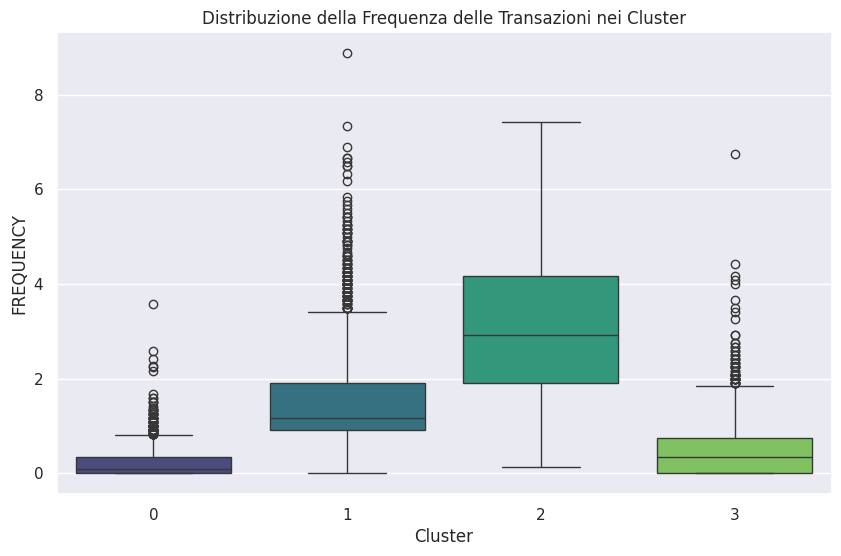


Statistiche medie della Frequenza delle Transazioni per ciascun cluster:
Cluster
0    0.190581
1    1.529265
2    3.100771
3    0.508412
Name: FREQUENCY, dtype: float64



In [ ]:
df['FREQUENCY'] = df['PURCHASES_TRX'] / df['TENURE']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='FREQUENCY', data=df, palette='viridis')
plt.title('Distribuzione della Frequenza delle Transazioni nei Cluster')
plt.show()

frequency_stats = df.groupby('Cluster')['FREQUENCY'].mean()
print(f"\nStatistiche medie della Frequenza delle Transazioni per ciascun cluster:\n{frequency_stats}\n")

**Commento**

**Interpretazione delle Statistiche sulla Frequenza delle Transazioni**

* **Variabilità Marcata tra i Cluster**: I valori medi della frequenza delle transazioni variano significativamente tra i cluster, da valori moderati a valori molto elevati. Questo suggerisce che hai cluster con comportamenti di acquisto distinti. Ad esempio, il cluster 3 potrebbe rappresentare clienti con un'alta frequenza di acquisto, mentre i cluster 1 e 2 potrebbero indicare clienti con una frequenza di acquisto inferiore

* **Differenze nelle Abitudini di Spesa**: I cluster con i valori medi più alti, come il cluster 3, potrebbero indicare clienti particolarmente attivi, che utilizzano frequentemente la loro carta di credito per effettuare acquisti. Al contrario, i cluster con valori medi inferiori potrebbero rappresentare clienti che fanno un uso meno frequente della carta

* **Risultati Basati su Dati Standardizzati**: Se i valori che descrivi sono il risultato di dati standardizzati, è importante notare che queste "medie" rappresentano posizioni relative all'interno del dataset piuttosto che valori assoluti di frequenza di transazione. Un valore medio positivo elevato indica clienti che eseguono transazioni con una frequenza significativamente superiore alla media del dataset, mentre i valori medi inferiori indicano frequenze inferiori alla media

* **Possibili Azioni**: I cluster con frequenze di transazione più elevate potrebbero essere presi in considerazione per strategie di marketing mirate o offerte speciali, al fine di incentivare ulteriormente gli acquisti

In [ ]:
cluster_stats = df.groupby('Cluster').mean()

for cluster_id, stats in cluster_stats.iterrows():
    print(f"\nCluster {cluster_id}:\n{stats}\n")


Cluster 0:
BALANCE                             1063.661715
BALANCE_FREQUENCY                      0.835482
PURCHASES                             -0.565217
ONEOFF_PURCHASES                     128.600391
INSTALLMENTS_PURCHASES                45.111606
CASH_ADVANCE                         732.487682
PURCHASES_FREQUENCY                   -0.892684
ONEOFF_PURCHASES_FREQUENCY             0.062288
PURCHASES_INSTALLMENTS_FREQUENCY       0.066839
CASH_ADVANCE_FREQUENCY                 0.145490
CASH_ADVANCE_TRX                       2.955694
PURCHASES_TRX                          2.233645
CREDIT_LIMIT                          -0.568629
PAYMENTS                             925.773925
MINIMUM_PAYMENTS                     529.313316
PRC_FULL_PAYMENT                       0.076455
TENURE                                11.689858
FREQUENCY                              0.190581
Name: 0, dtype: float64


Cluster 1:
BALANCE                              797.656229
BALANCE_FREQUENCY                      

**Commento**

Il dataset è stato suddiviso in quattro cluster distinti utilizzando l'algoritmo K-Means. Ogni cluster rappresenta un gruppo di clienti con comportamenti finanziari simili. Di seguito sono riportate le principali caratteristiche di ciascun cluster:

**Cluster 0**:

* Frequenza di acquisti bassa (7.67 transazioni in media)
* Utilizzo meno frequente della carta di credito
* Frequenza di pagamento elevata
Saldo medio più basso

**Cluster 1**:

* Attività finanziaria di livello medio
* Frequenza di acquisti e numero di transazioni moderati
* Saldo medio relativamente basso
Preferenza per gli acquisti rateali

**Cluster 2**:

* Frequenza di acquisti molto elevata (28.99 transazioni in media)
* Saldo medio più basso rispetto agli altri cluster
* Utilizzo frequente della carta di credito per acquisti one-off e rateali

**Cluster 3**:

* Clienti più attivi e coinvolti
* Elevato numero medio di transazioni (36.03) e frequenza di acquisti elevata
* Saldo medio più alto rispetto agli altri cluster
* Preferenza sia per gli acquisti one-off che rateali

**Frequenza delle Transazioni**:

* **Cluster 3**: Mostra una frequenza di acquisto moderata, indicando una spesa regolare e un buon controllo del saldo.
* **Cluster 2**: Presenta una frequenza di acquisto relativamente bassa, suggerendo un potenziale per aumentare gli acquisti da parte di clienti con elevati saldi.
* **Cluster 0 e 1**: Rivelano basse frequenze di acquisto, indicando un basso coinvolgimento finanziario.

**Azioni Potenziali**:

* **Cluster 3**: Incentivi per aumentare la frequenza di acquisto e programmi di fidelizzazione.
* **Cluster 2**: Strategie per stimolare acquisti più frequenti da parte di clienti con saldi elevati.
* **Cluster 0 e 1**: Campagne di coinvolgimento e offerte speciali per stimolare l'attività.

L'analisi fornisce una base solida per l'implementazione di strategie di marketing mirate a ciascun cluster, tenendo conto delle loro caratteristiche finanziarie uniche.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


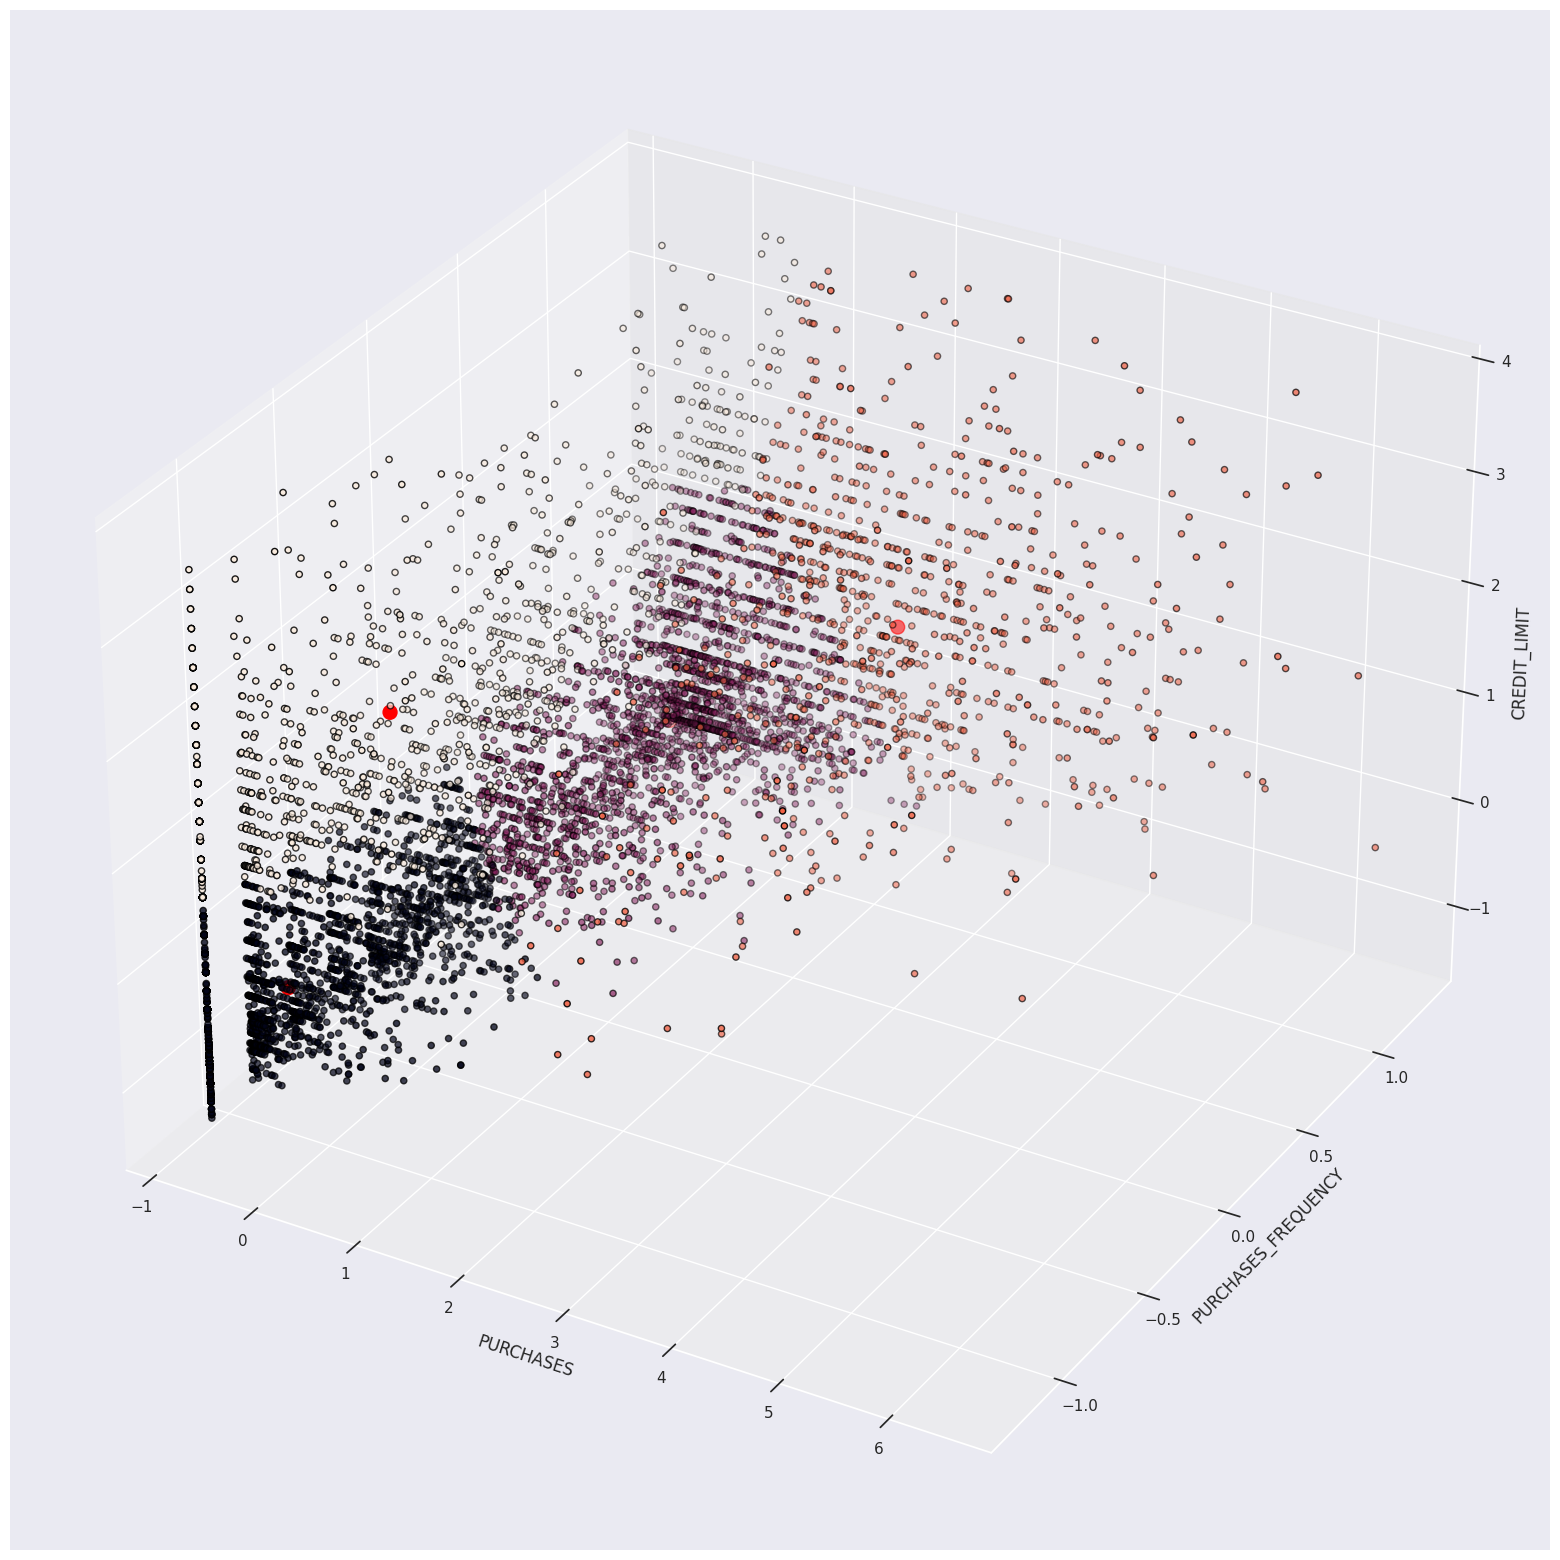

In [ ]:
selected_features = ["PURCHASES", "PURCHASES_FREQUENCY", "CREDIT_LIMIT"]
X_selected = df[selected_features]

kmeans.fit(X_selected)

plot_clusters3d(kmeans, X_selected.values, axlabels=selected_features)

In [ ]:
selected_features = ["PURCHASES", "PURCHASES_FREQUENCY", "CREDIT_LIMIT"]
cluster_summary, cluster_stats = summarize_cluster3d(kmeans, X_selected.values, selected_features)
print("Centri dei Cluster:")
print(cluster_summary)
print("\nStatistiche dei Cluster:")
print(cluster_stats)

Centri dei Cluster:
   PURCHASES  PURCHASES_FREQUENCY  CREDIT_LIMIT  Cluster
0  -0.565137            -0.892145     -0.569234        0
1   0.051440             0.933503     -0.399596        1
2   2.175790             1.026740      0.927981        2
3  -0.322420            -0.436880      1.396792        3

Statistiche dei Cluster:
         PURCHASES  PURCHASES_FREQUENCY  CREDIT_LIMIT
Cluster                                              
0        -0.565217            -0.892684     -0.568629
1         0.051263             0.932752     -0.400088
2         2.175790             1.026740      0.927981
3        -0.322686            -0.436756      1.397621


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


**Commento**

I "Centri dei Cluster" rappresentano i valori medi delle caratteristiche chiave per ciascun cluster nello spazio tridimensionale. Esempio:

* **Cluster 0**, mostra valori medi di acquisti, frequenza di acquisti e limite di credito inferiori rispetto agli altri cluster;
* **Cluster 1**, presenta valori medi più bilanciati, con una frequenza di acquisti notevole e un limite di credito moderato;
* **Cluster 2**, si distingue per valori elevati di acquisti, frequenza di acquisti e un limite di credito più alto rispetto agli altri cluster;
* **Cluster 3**, ha valori medi intermedi, con una frequenza di acquisti leggermente più bassa ma un limite di credito superiore;

Le "Statistiche dei Cluster" forniscono una panoramica più dettagliata delle medie delle caratteristiche per ciascun cluster, offrendo una visione più completa delle differenze tra i gruppi

In generale, questi risultati suggeriscono una segmentazione chiara tra i cluster, con ciascun gruppo che presenta tratti distintivi nei comportamenti di acquisto e limiti di credito. Tale segmentazione può essere sfruttata per strategie di marketing mirate e personalizzate

## Profilazione cluster

#### Scatter Plot: Relazione tra Saldo e Anticipo in Contanti per Cluster

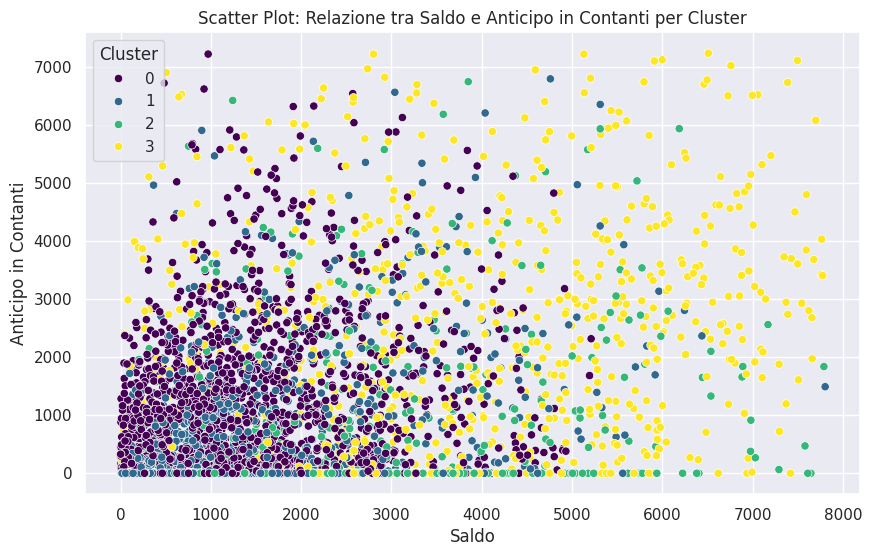

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BALANCE', y='CASH_ADVANCE', hue='Cluster', data=df, palette='viridis')
plt.title('Scatter Plot: Relazione tra Saldo e Anticipo in Contanti per Cluster')
plt.xlabel('Saldo')
plt.ylabel('Anticipo in Contanti')
plt.legend(title='Cluster')
plt.show()

In [ ]:
scatterplot_centers, scatterplot_stats = summarize_scatterplot_clusters(df, 'BALANCE', 'CASH_ADVANCE', 'Cluster')

print("Centri dei Cluster per il Grafico di Dispersione:")
print(scatterplot_centers)

print("\nStatistiche dei Cluster per il Grafico di Dispersione:")
print(scatterplot_stats)

Centri dei Cluster per il Grafico di Dispersione:
             BALANCE  CASH_ADVANCE
Cluster                           
0        1063.661715    732.487682
1         797.656229    302.902638
2        1644.633726    436.418412
3        2363.863689   1390.558848

Statistiche dei Cluster per il Grafico di Dispersione:
Cluster                       0            1            2            3
BALANCE      count  2889.000000  2389.000000   883.000000  1273.000000
             mean   1063.661715   797.656229  1644.633726  2363.863689
             std    1009.379290  1056.467599  1701.094617  2288.857309
             min       0.004816     0.001289     1.632453     0.001214
             25%     160.530303    65.701893   311.448500   130.484418
             50%     927.041961   322.411152   921.693369  1879.114033
             75%    1552.772103  1179.159897  2483.004890  4164.796859
             max    5211.229218  7803.071972  7789.190958  7776.436900
CASH_ADVANCE count  2889.000000  2389.000000 

**Commento**

Il grafico a dispersione mostra chiaramente le differenze nei comportamenti finanziari dei clienti, distinti in cluster sulla base del saldo e dell'anticipo in contanti.

0. **Cluster 0** - "Equilibrio Conservativo": il cluster mostra un bilancio finanziario conservativo con un saldo medio inferiore rispetto agli altri cluster, ma con un anticipo in contanti significativo.
1. **Cluster 1** - "Attività Moderata": il cluster rappresenta clienti con un livello di attività finanziaria moderato, con un saldo medio relativamente basso e un anticipo in contanti limitato.
2. **Cluster 2** - "Attività di Acquisto Elevata": il cluster è caratterizzato da un comportamento di acquisto distintivo, con una frequenza di acquisti elevata e un saldo medio più basso rispetto agli altri cluster.
3. **Cluster 3** - "Alta Attività Finanziaria": il cluster rappresenta i clienti più attivi e coinvolti finanziariamente, con un elevato saldo medio e un anticipo in contanti significativo.

**Interpretazioni e Implicazioni Strategiche**:

* Equilibrio Finanziario: Il Cluster 0 potrebbe indicare clienti con una gestione finanziaria più conservativa, preferendo limitare l'anticipo in contanti nonostante un saldo più basso.

**Opportunità di Coinvolgimento**: I Cluster 1 e 2 potrebbero presentare opportunità di coinvolgimento. Esempio, il Cluster 1 potrebbe beneficiare di offerte mirate a incrementare l'attività, mentre il Cluster 2 potrebbe essere stimolato a effettuare acquisti più frequenti.

**Target Strategico**: Il Cluster 3, con il saldo e l'anticipo in contanti più elevati, potrebbe essere un target strategico per offerte premium o programmi fedeltà, considerando il loro elevato coinvolgimento finanziario.

#### Distribuzione del Saldo per Cluster

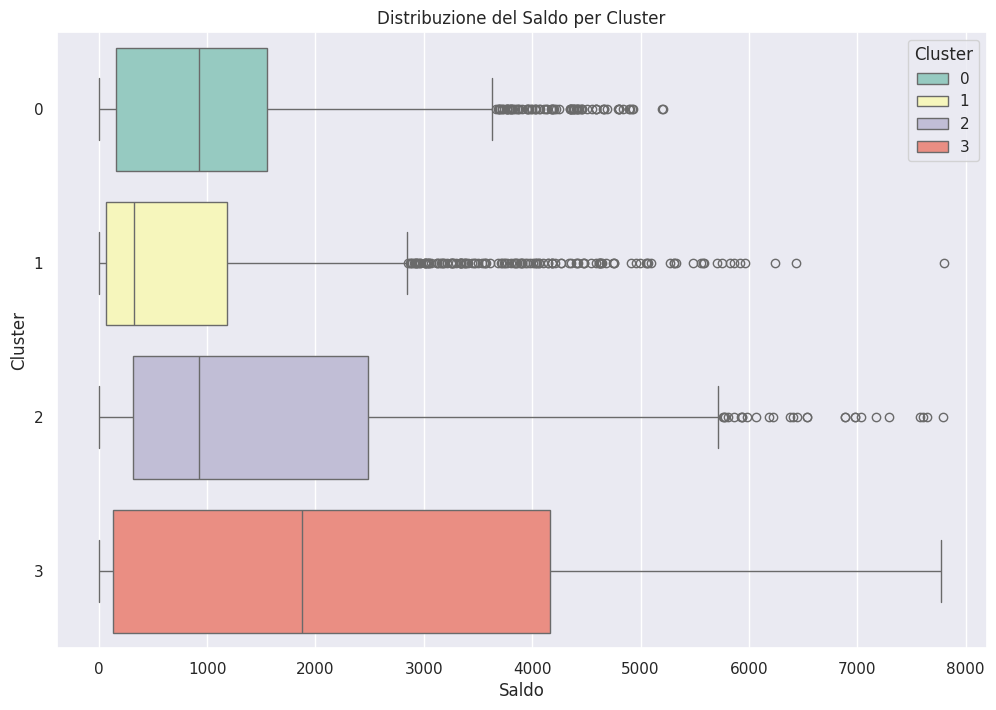

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='BALANCE', y='Cluster', data=df, hue='Cluster', orient='h', palette='Set3', dodge=False)
plt.title('Distribuzione del Saldo per Cluster')
plt.xlabel('Saldo')
plt.ylabel('Cluster')
plt.show()

In [ ]:
summarize_balance_distribution(df)

Statistiche della Distribuzione del Saldo per Cluster:
          count         mean          std       min         25%          50%  \
Cluster                                                                        
0        2889.0  1063.661715  1009.379290  0.004816  160.530303   927.041961   
1        2389.0   797.656229  1056.467599  0.001289   65.701893   322.411152   
2         883.0  1644.633726  1701.094617  1.632453  311.448500   921.693369   
3        1273.0  2363.863689  2288.857309  0.001214  130.484418  1879.114033   

                 75%          max  
Cluster                            
0        1552.772103  5211.229218  
1        1179.159897  7803.071972  
2        2483.004890  7789.190958  
3        4164.796859  7776.436900  


**Commento**

Il boxplot illustra la distribuzione del saldo all'interno di ciascun cluster, offrendo un'analisi dettagliata delle differenze nei saldi tra i vari gruppi. Di seguito sono riportate le principali osservazioni:

- **Cluster 0**: Presenta una distribuzione di saldi con una notevole variabilità, con alcuni clienti che mantengono saldi più bassi, mentre altri mostrano saldi più elevati. La mediana è posizionata intorno a 927, indicando un equilibrio finanziario moderato.

- **Cluster 1**: Mostra una distribuzione di saldi con una gamma più compatta rispetto agli altri cluster. La mediana si trova a circa 322, suggerendo che la maggior parte dei clienti in questo cluster ha saldi relativamente contenuti.

- **Cluster 2**: Rappresenta una vasta gamma di saldi, con una mediana di circa 922. La distribuzione indica la presenza di clienti con saldi bassi e altri con saldi notevolmente più elevati. Questa diversità potrebbe riflettere differenti comportamenti finanziari all'interno del cluster.

- **Cluster 3**: Mostra una distribuzione dei saldi con una notevole variabilità e la presenza di valori estremi. La mediana è significativamente più alta, indicando che molti clienti in questo cluster mantengono saldi elevati. La distribuzione potrebbe riflettere una maggiore attività finanziaria e l'uso più esteso della carta di credito.

In sintesi, il boxplot offre una panoramica chiara delle caratteristiche dei saldi nei diversi cluster, evidenziando le differenze e la variabilità all'interno di ciascun gruppo.

#### Medie delle Caratteristiche per Cluster

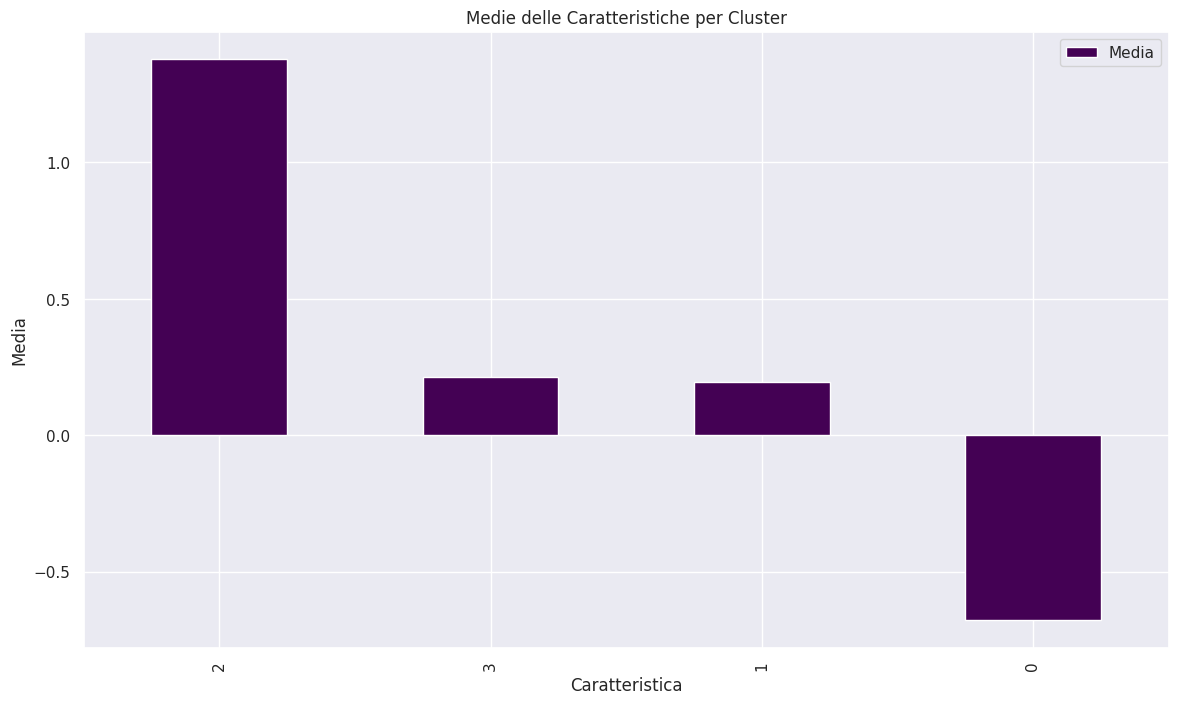

In [ ]:
cluster_stats_sorted = cluster_stats.transpose().mean().sort_values(ascending=False)
cluster_stats_sorted_df = pd.DataFrame(cluster_stats_sorted, columns=['Media'])

cluster_stats_sorted_df.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Medie delle Caratteristiche per Cluster')
plt.xlabel('Caratteristica')
plt.ylabel('Media')
plt.show()

In [ ]:
print("\nMedie delle Caratteristiche per Cluster (in ordine decrescente):")
print(cluster_stats_sorted)


Medie delle Caratteristiche per Cluster (in ordine decrescente):
Cluster
2    1.376837
3    0.212727
1    0.194642
0   -0.675510
dtype: float64


**Commento**

Il grafico a barre rappresenta in modo dettagliato le medie delle diverse caratteristiche per ciascun cluster, ordinato in base alla media complessiva.
I cluster mostrano differenze significative nelle varie caratteristiche, evidenziando i tratti distintivi di ciascun gruppo.

L'analisi mostra chiaramente che **Cluster 2**,che evidenzia una prevalenza di tratti distintivi nei comportamenti finanziari dei clienti assegnati, e **Cluster 3**, nel quale c'è una forte presenza di caratteristiche specifiche, spiccano per medie più elevate, suggerendo una maggiore omogeneità all'interno di questi gruppi rispetto agli altri, nello specifico il **Cluster 3**. **Cluster 1** presenta un profilo intermedio, mentre **Cluster 0** mostra una media complessiva più bassa, evidenziando tratti distintivi meno pronunciati e suggerendo un insieme unico di caratteristiche finanziarie rispetto agli altri cluster. Questi dettagli offrono una panoramica più completa delle differenze nelle caratteristiche finanziarie tra i vari gruppi di clienti.

#### Medie delle Caratteristiche per Cluster con Barre di Errore

<ipython-input-45-c6d1738195f3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_stats_sorted.index, y=cluster_stats_sorted.values, palette='viridis')


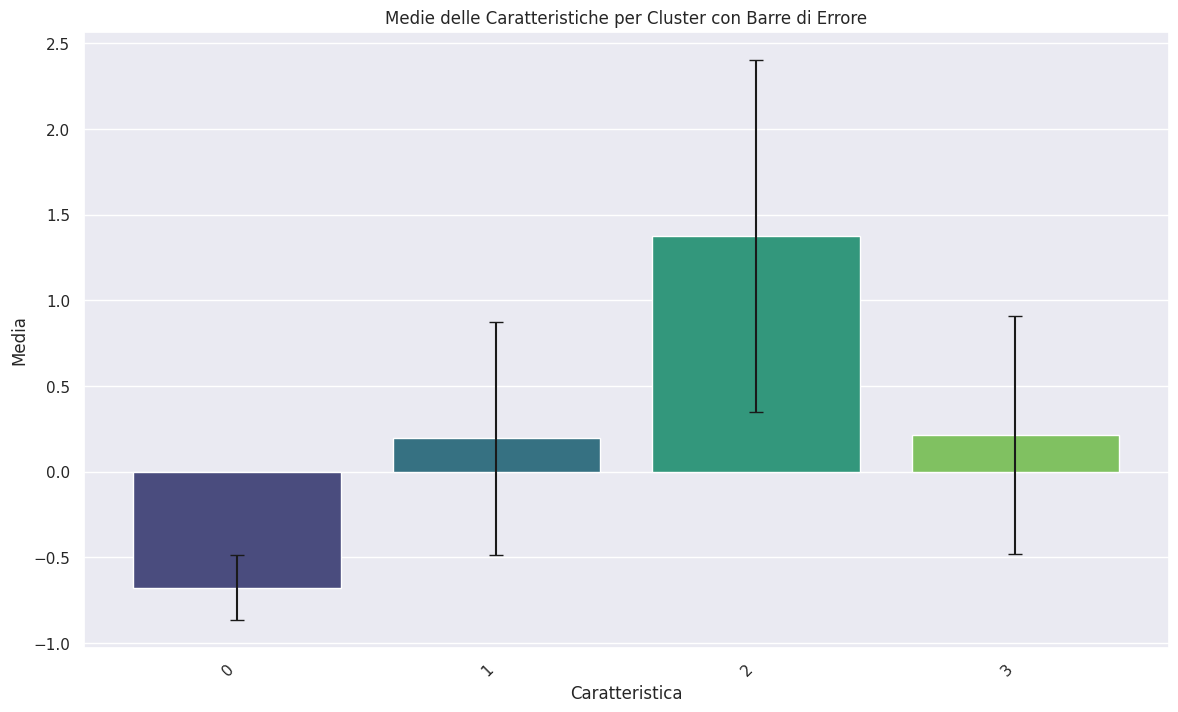

In [ ]:
cluster_stats_std = cluster_stats.transpose().std().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=cluster_stats_sorted.index, y=cluster_stats_sorted.values, palette='viridis')
plt.errorbar(x=cluster_stats_sorted.index, y=cluster_stats_sorted.values, yerr=cluster_stats_std.values, fmt='none', color='k', capsize=5)
plt.title('Medie delle Caratteristiche per Cluster con Barre di Errore')
plt.xlabel('Caratteristica')
plt.ylabel('Media')
plt.xticks(rotation=45, ha='right')
plt.show()

Questo grafico a barre include anche barre di errore che rappresentano la variabilità delle medie per ciascuna caratteristica all'interno di ciascun cluster

Le barre di errore aggiungono una dimensione di incertezza alle medie, permettendo di valutare la coerenza delle misurazioni

## Utilizzo del modello

In [ ]:
y_pred = kmeans.predict(X)
print(y_pred)

[0 3 1 ... 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
df_result = pd.DataFrame({
    "Cluster":df["Cluster"],
    "Customer Group":y_pred,
})

df_result.head()

,Cluster,Customer Group
0,0,0
1,3,3
2,1,1
3,3,3
4,0,0


**Commento**

I risultati della previsione con il modello K-Means mostrano che ogni istanza nel dataset è stata assegnata a un particolare cluster. Le etichette dei cluster, rappresentate dai numeri, indicano la suddivisione della clientela in gruppi distinti in base alle caratteristiche considerate dal modello. Ad esempio, l'istanza con indice 0 appartiene al cluster 0, mentre l'istanza con indice 1 appartiene al cluster 3. Queste etichette possono ora essere utilizzate per ulteriori analisi e strategie di marketing mirate a ciascun gruppo